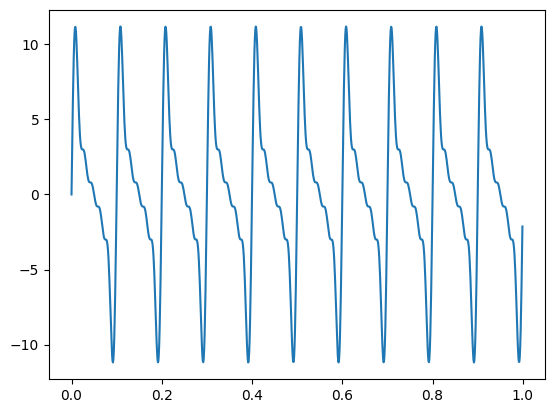

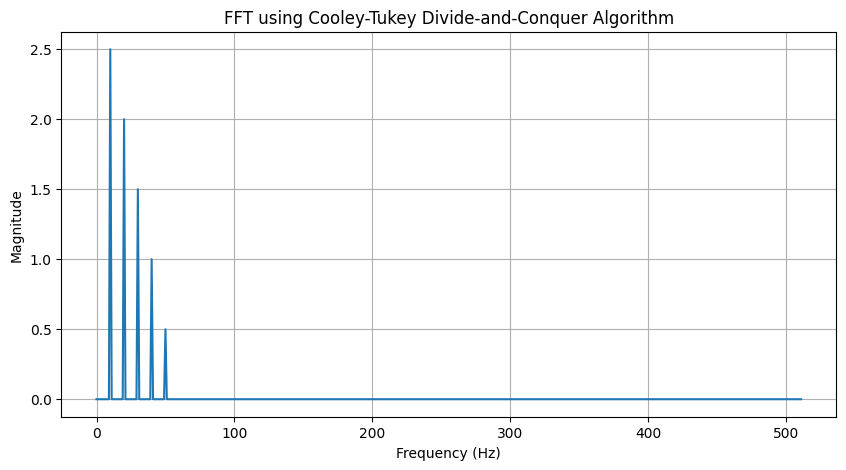

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cooley_tukey_fft_dc(x):
    N = len(x)
    if N == 1:
        return x
    if np.log2(N) % 1 > 0:
        raise ValueError("Input size must be a power of 2")

    even_part = cooley_tukey_fft_dc(x[0::2])
    odd_part = cooley_tukey_fft_dc(x[1::2])
    
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N) / N)
    result = np.zeros(N, dtype=complex)
    half_N = N // 2

    for k in range(half_N):
        t = twiddle_factors[k] * odd_part[k]
        result[k] = even_part[k] + t
        result[k + half_N] = even_part[k] - t

    return result

N = 1024
t = np.linspace(0, 1, N, endpoint=False)
freq1, freq2, freq3, freq4, freq5 = 10, 20, 30, 40, 50
signal = (5*np.sin(2 * np.pi * freq1 * t) + 
          4*np.sin(2 * np.pi * freq2 * t) + 
          3*np.sin(2 * np.pi * freq3 * t) + 
          2*np.sin(2 * np.pi * freq4 * t) + 
          np.sin(2 * np.pi * freq5 * t))

# fft_result = cooley_tukey_fft_dc(signal)
fft_result = np.fft.ifft(signal)
frequencies = np.fft.fftfreq(N, d=t[1] - t[0])

plt.plot(t, signal)
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:N//2], np.abs(fft_result[:N//2]))
plt.title("FFT using Cooley-Tukey Divide-and-Conquer Algorithm")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()